In [1]:
import pymc as pm
import numpy as np
import arviz as az
import matplotlib.pyplot as plt

# 仮想的なデータを生成
n_groups = 8  # グループの数
n_samples_per_group = 100  # 各グループのサンプル数
true_means = np.random.normal(0, 50, n_groups)  # 各グループの真の平均
data = [np.random.normal(mu, 1, n_samples_per_group) for mu in true_means]

# モデルの定義
class BeyesModel(pm.Model):
    def __init__(self, *args, **kwargs):
        super().__init__(*args, **kwargs)
        with self:
            # グループ平均の事前分布
            group_means = pm.Normal('group_means', mu=0, sigma=10, shape=n_groups)
            # 観測データの誤差項 (グループ数 > 5かつ十分大なら一様分布でもいい)
            # epsilon = pm.HalfCauchy('epsilon', 5)
            epsilon = pm.Uniform('epsilon', 0, 50)
            
            # 観測データの尤度
            for i in range(n_groups):
                pm.Normal('obs_{}'.format(i), mu=group_means[i], sigma=epsilon, observed=data[i])

model = BeyesModel()



WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


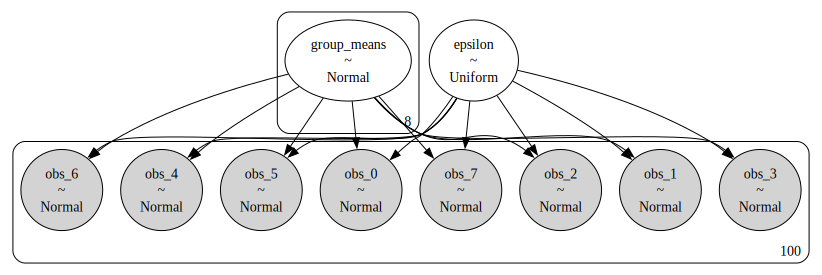

In [17]:
# モデルの図示
gv = pm.model_to_graphviz(model)
gv

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [group_means, epsilon]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 1 seconds.


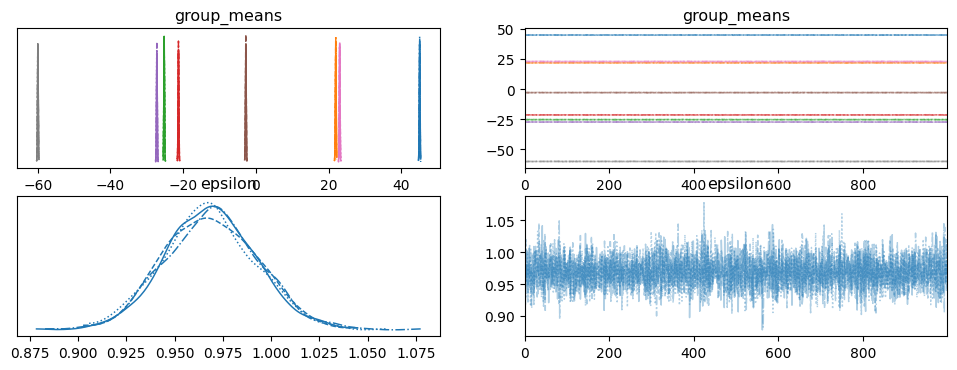

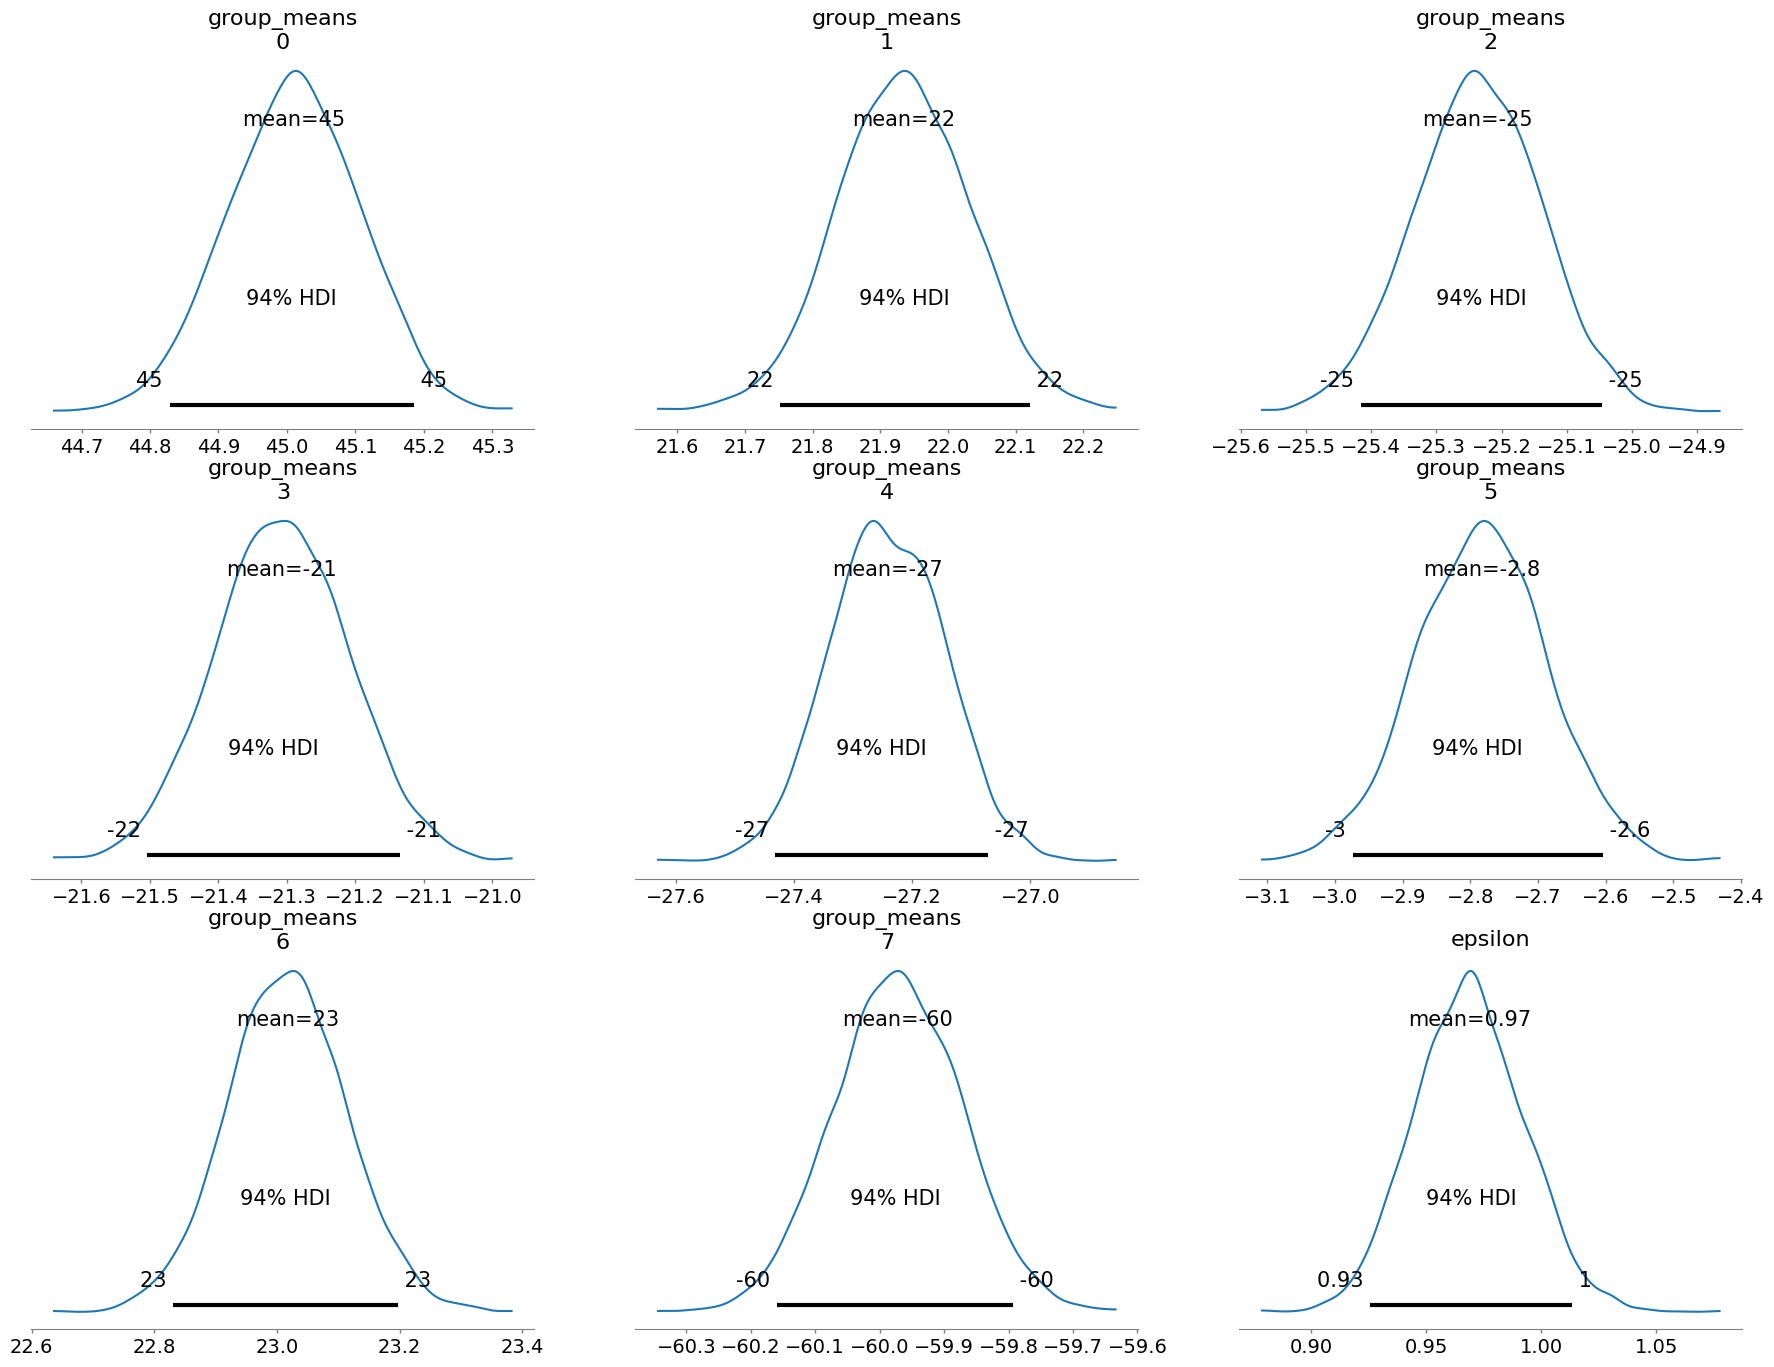

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
group_means[0],45.010,0.096,44.829,45.186,0.001,0.001,4762.0,3084.0,1.0
group_means[1],21.934,0.099,21.751,22.120,0.001,0.001,4821.0,3109.0,1.0
group_means[2],-25.236,0.098,-25.416,-25.046,0.001,0.001,5526.0,3329.0,1.0
group_means[3],-21.308,0.098,-21.504,-21.134,0.001,0.001,5063.0,3152.0,1.0
group_means[4],-27.243,0.098,-27.432,-27.072,0.001,0.001,4604.0,3203.0,1.0
group_means[5],-2.783,0.097,-2.974,-2.604,0.001,0.001,4865.0,3074.0,1.0
group_means[6],23.017,0.097,22.830,23.197,0.001,0.001,4330.0,2913.0,1.0
group_means[7],-59.973,0.098,-60.160,-59.793,0.001,0.001,4778.0,3229.0,1.0
epsilon,0.969,0.024,0.925,1.014,0.000,0.000,5316.0,3131.0,1.0


In [18]:

# MCMCサンプリング
trace = pm.sample(1000, return_inferencedata=True, model=model)

# トレースプロットの生成
az.plot_trace(trace)
plt.show()


# 事後分布のプロット
az.plot_posterior(trace)
plt.show()

# 結果の表示
az.summary(trace)


In [19]:
print("true means: ", true_means)

true means:  [ 44.98867982  21.75995291 -25.33775719 -21.23742077 -27.29383886
  -2.78030893  22.9880978  -59.97732696]
